**Importación de librerías necesarias**


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
from joblib import dump, load


**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WineQT.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Tipos de datos del df

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Mostrar un mapa de calor que indique la correlación entre vriables

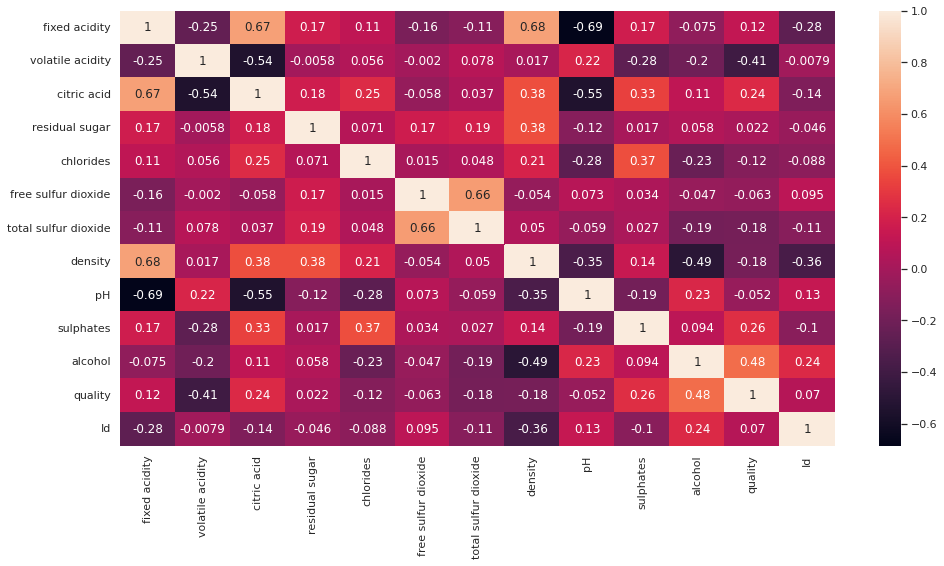

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
# campos : fixed acidity	,citric acid,residual sugar , density	, pH,sulphates,alcohol,
# quality

df_filtrado  = pd.DataFrame()
df_filtrado = df[['fixed acidity', 'citric acid','residual sugar','density',
                  'pH','sulphates','alcohol','quality']].copy()
                  
df_filtrado
# df_filtrado.plot()

,fixed acidity,citric acid,residual sugar,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.99574,3.42,0.75,11.0,6
1139,6.8,0.08,1.9,0.99651,3.42,0.82,9.5,6
1140,6.2,0.08,2.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.10,2.2,0.99512,3.52,0.76,11.2,6


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_wine = df_filtrado.drop('quality',axis = 1)
y_wine = df_filtrado['quality']



Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_wine,y_wine,
                                                 train_size = 0.8,
                                                 test_size = 0.2
                                                 )



---


**AQUI COMIENZA LO DE ARBOLES**

---



**Entrenamiento y predicción**

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y
entrenar el modelo

In [ ]:
# instanciacion

arbol = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

Mostrar el árbol de decisión resultante

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[6] <= 9.925\\ngini = 0.639\\nsamples = 914\\nvalue = [6, 25, 385, 374, 111, 13]"] ;\n1 [label="X[5] <= 0.575\\ngini = 0.476\\nsamples = 385\\nvalue = [3, 11, 257, 107, 6, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 3.54\\ngini = 0.301\\nsamples = 167\\nvalue = [2, 6, 138, 20, 1, 0]"] ;\n1 -> 2 ;\n3 [label="gini = 0.28\\nsamples = 164\\nvalue = [2, 6, 138, 17, 1, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 0, 3, 0, 0]"] ;\n2 -> 4 ;\n5 [label="X[0] <= 10.85\\ngini = 0.542\\nsamples = 218\\nvalue = [1, 5, 119, 87, 5, 1]"] ;\n1 -> 5 ;\n6 [label="gini = 0.514\\nsamples = 203\\nvalue = [1, 4, 118, 78, 2, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.587\\nsamples = 15\\nvalue = [0, 1, 1, 9, 3, 1]"] ;\n5 -> 7 ;\n8 [label="X[6] <= 11.55\\ngini = 0.646\\nsamples = 529\\nvalue = [3, 14, 128, 267, 105, 12]"] ;\n0 -> 8 [labeldistance=2.

Mostrar la importancia de cada atributo en el árbol resultante


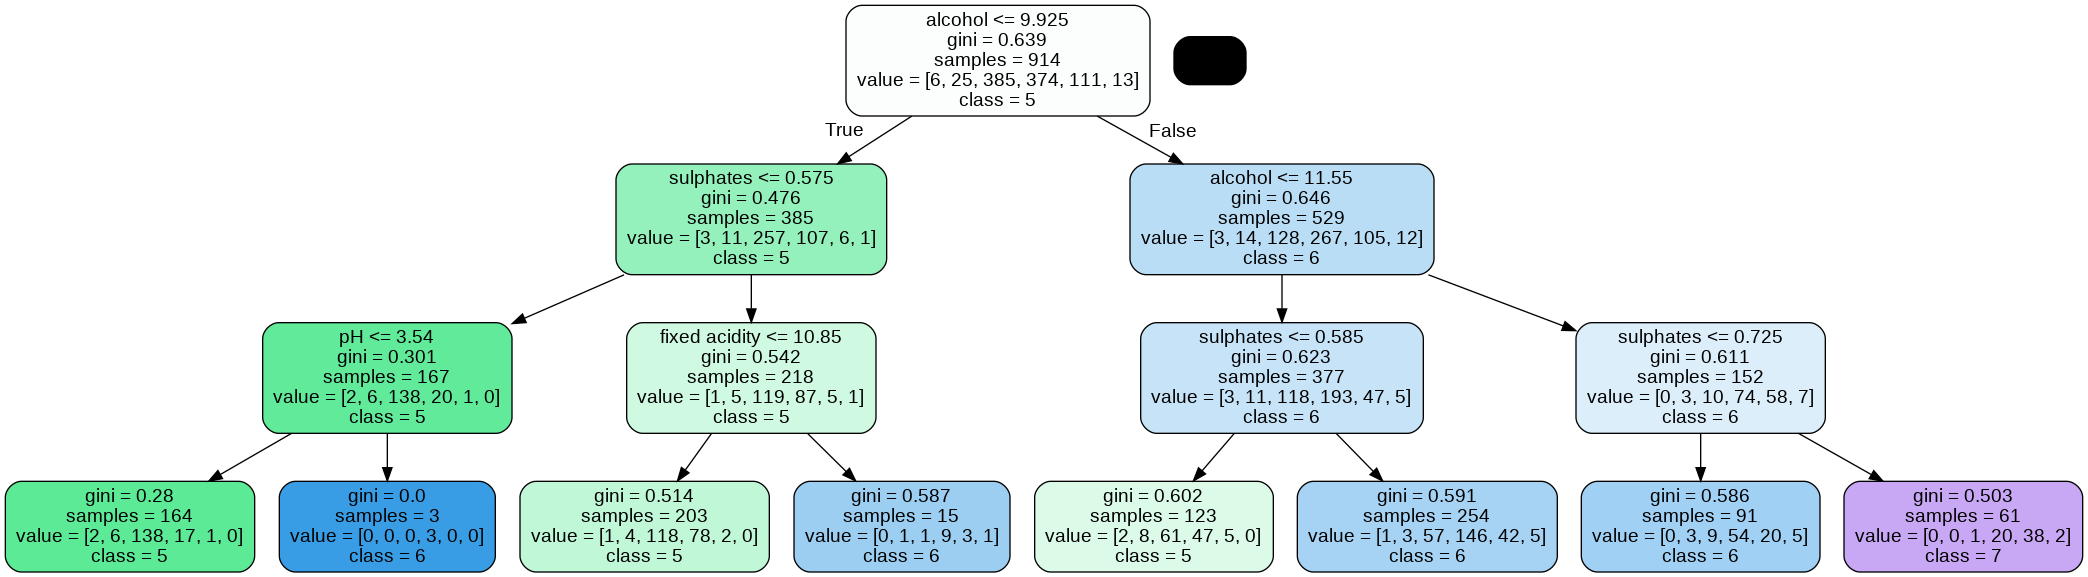

In [ ]:
from pandas._libs.tslibs import dtypes
dot_data = StringIO()


arbol_classes = []
# arbol_classes
for i in arbol.classes_:
  i = str(i)
  arbol_classes.append(i)

tree.export_graphviz(arbol, out_file = dot_data, class_names= arbol_classes, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


Intenta guardar el modelo de predicción ya entrenado usando dump (https://scikitlearn.org/stable/modules/model_persistence.html)

In [ ]:
dump(arbol, 'arbol.joblib')

['arbol.joblib']

In [ ]:
arbol2 = load('arbol.joblib') 

In [ ]:
arbol2

DecisionTreeClassifier(max_depth=3)

**Evaluación**

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
accuracy_score(y_test,y_predict)

0.5851528384279476

Mostrar la predicción realizada (imprimir la variable con la predicción)


In [ ]:
y_predict

array([6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 7, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6, 5, 7, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 7, 5, 7, 6, 5,
       7, 5, 6, 5, 6, 5, 6, 5, 5])

Representar gráficamente la clasificación obtenida (matriz de confusión)

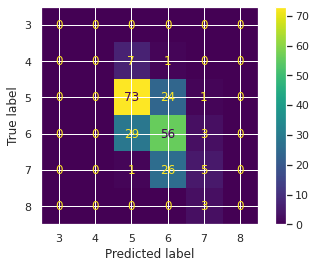

In [ ]:
y_model = y_predict

cm = confusion_matrix(y_test, y_model, labels= arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= arbol.classes_)
disp.plot()

plt.show()


**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (profundidad de árbol y criterio). Para ello
realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad
de árbol de 1 a 15.

In [ ]:
# instanciacion

criterions = ['gini','entropy']
porcentajes = []
max_depths = 0
max_criterion = ""

for criterion in criterions:
  for max_depth in range(1,16):
    arbol = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth)

    # entrenamiento
    arbol.fit(x_train,y_train)

    # prediccion
    y_predict = arbol.predict(x_test)

    accuracy_score(y_test,y_predict)


    porcentajes.append(accuracy_score(y_test,y_predict))

    if max(porcentajes) == accuracy_score(y_test,y_predict):
      max_criterion = criterion
      max_depths = max_depth


    print(f"El porcentaje: {accuracy_score(y_test,y_predict)} con criterion como: {criterion} y con max_depth como: {max_depth}")

El porcentaje: 0.5109170305676856 con criterion como: gini y con max_depth como: 1
El porcentaje: 0.5109170305676856 con criterion como: gini y con max_depth como: 2
El porcentaje: 0.5851528384279476 con criterion como: gini y con max_depth como: 3
El porcentaje: 0.5545851528384279 con criterion como: gini y con max_depth como: 4
El porcentaje: 0.5240174672489083 con criterion como: gini y con max_depth como: 5
El porcentaje: 0.6026200873362445 con criterion como: gini y con max_depth como: 6
El porcentaje: 0.5633187772925764 con criterion como: gini y con max_depth como: 7
El porcentaje: 0.5676855895196506 con criterion como: gini y con max_depth como: 8
El porcentaje: 0.5982532751091703 con criterion como: gini y con max_depth como: 9
El porcentaje: 0.5938864628820961 con criterion como: gini y con max_depth como: 10
El porcentaje: 0.5807860262008734 con criterion como: gini y con max_depth como: 11
El porcentaje: 0.5545851528384279 con criterion como: gini y con max_depth como: 12
E

In [ ]:
print(f"El valor max de porcentaje es:{max(porcentajes)}, con criterion = {max_criterion}, y max_depth={max_depths}")

El valor max de porcentaje es:0.6026200873362445, con criterion = gini, y max_depth=6


 Con ello obtendremos una medida de bondad del modelo (accuracy_score o
mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5
ejecuciones.


In [ ]:
kf = KFold(n_splits = 5)

# parámetros: modelo, los datos de entrenamiento separados (x, y)
# y el KFold con los splits
# devuelve la media de las ejecuciones
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    # obtengo cada partición
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    # entrenamiento
    model.fit(x_train_fold, y_train_fold)
    # predicción
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)
validacion_cruzada_cl(arbol,x_train,y_train,kf)

0.5229328049000179

Finalmente los parámetros elegidos serán los que den mejor media de esas medidas
anteriormente nombradas

In [ ]:
# instanciacion

arbol = DecisionTreeClassifier(criterion = max_criterion,max_depth=max_depths)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

array([6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 5, 7, 7, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 6, 5, 5, 5, 6, 8,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 8, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       7, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6,
       6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 7, 7, 6, 7, 7, 5,
       7, 5, 6, 5, 5, 5, 6, 6, 5])

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[6] <= 9.925\\ngini = 0.639\\nsamples = 914\\nvalue = [6, 25, 385, 374, 111, 13]"] ;\n1 [label="X[5] <= 0.575\\ngini = 0.476\\nsamples = 385\\nvalue = [3, 11, 257, 107, 6, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 3.54\\ngini = 0.301\\nsamples = 167\\nvalue = [2, 6, 138, 20, 1, 0]"] ;\n1 -> 2 ;\n3 [label="X[1] <= 0.645\\ngini = 0.28\\nsamples = 164\\nvalue = [2, 6, 138, 17, 1, 0]"] ;\n2 -> 3 ;\n4 [label="X[5] <= 0.36\\ngini = 0.271\\nsamples = 163\\nvalue = [1, 6, 138, 17, 1, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0]"] ;\n4 -> 5 ;\n6 [label="X[3] <= 0.996\\ngini = 0.262\\nsamples = 162\\nvalue = [1, 5, 138, 17, 1, 0]"] ;\n4 -> 6 ;\n7 [label="gini = 0.374\\nsamples = 50\\nvalue = [0, 1, 38, 11, 0, 0]"] ;\n6 -> 7 ;\n8 [label="gini = 0.199\\nsamples = 112\\nvalue = [1, 4, 100, 6, 1, 0]"] ;\n6 -> 8 ;\n9 [

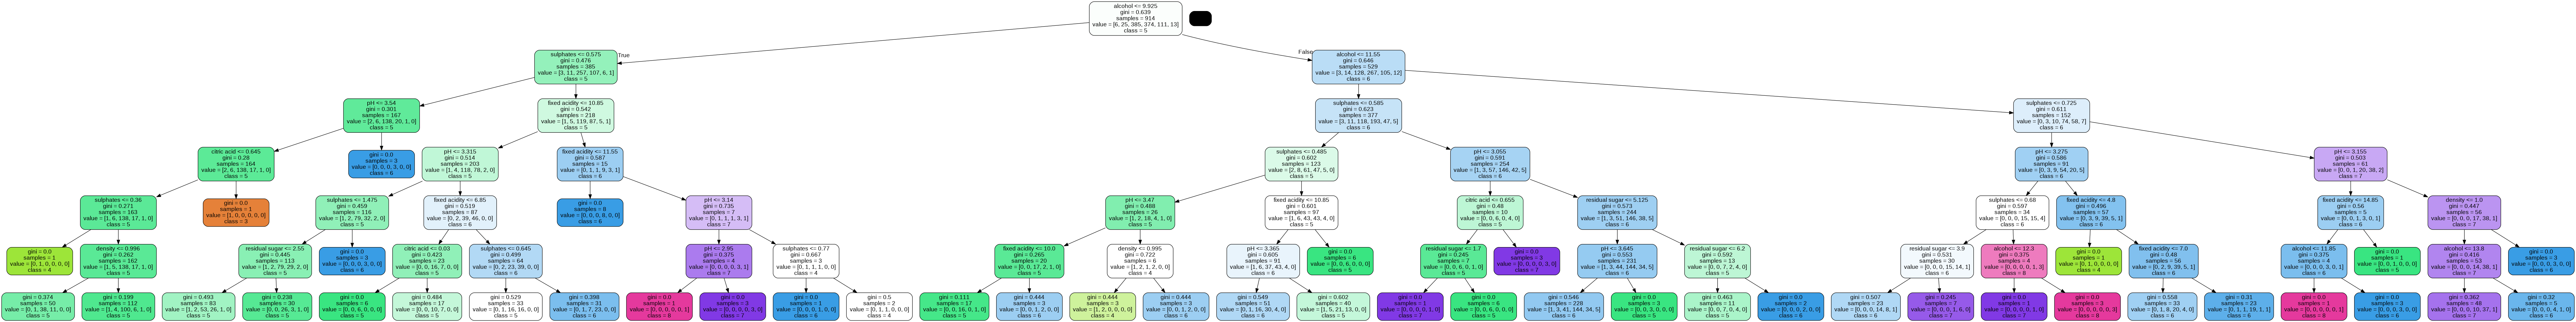

In [ ]:
dot_data = StringIO()

tree.export_graphviz(arbol, out_file = dot_data, class_names= arbol_classes, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
accuracy_score(y_test,y_predict)

0.6157205240174672

Mostrar la predicción realizada (imprimir la variable con la predicción)

In [ ]:
y_predict

array([6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 5, 7, 7, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 6, 5, 5, 5, 6, 8,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 8, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       7, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6,
       6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 7, 7, 6, 7, 7, 5,
       7, 5, 6, 5, 5, 5, 6, 6, 5])

Representar gráficamente la clasificación obtenida (matriz de confusión)

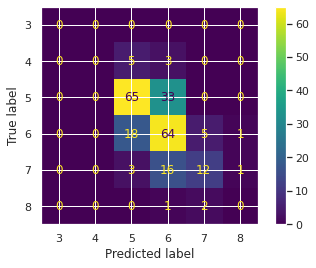

In [ ]:
y_model = y_predict

cm = confusion_matrix(y_test, y_model, labels= arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= arbol.classes_)
disp.plot()

plt.show()
